<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-rdvicen1/blob/main/Ejerciciolibre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown --id 1Osmr7qVN0NMuqYxvLesNn7H4nqPCVbsU

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Osmr7qVN0NMuqYxvLesNn7H4nqPCVbsU
To: /content/data_berka.db
100% 70.2M/70.2M [00:00<00:00, 84.7MB/s]


In [ ]:
%load_ext sql

In [ ]:
%sql sqlite:///data_berka.db

'Connected: @data_berka.db'

In [ ]:
%%sql
SELECT name,type
FROM sqlite_master
WHERE type = 'table'

 * sqlite:///data_berka.db
Done.


name,type
DISTRICT,table
ACCOUNT,table
TRANS,table
CLIENT,table
DISPOSITION,table
CREDIT_CARD,table
LOAN,table
PERMANENT_ORDER,table


In [ ]:
%%sql
SELECT distinct type
FROM CREDIT_CARD

 * sqlite:///data_berka.db
Done.


type
classic
junior
gold


In [ ]:
#Esta tabla tarjeta2 es solo para el trabajo con orange.
%%sql
tarjeta2 << SELECT  substr(c.birth_number,0,3) age, d.amount amount_op, e.amount amount_prest,	duration duration_prest, status, a.type tipo_tarj, k_symbol
FROM CREDIT_CARD a, DISPOSITION b, CLIENT c, TRANS d, LOAN e
WHERE a.disp_id = b.disp_id
AND b.client_id = c.client_id
AND b.account_id = d.account_id
AND b.account_id = e.account_id
AND b.type = "OWNER"
AND k_symbol in ("DUCHOD", "UROK", "SIPO", "SLUZBY", "POJISTNE", "SANKC. UROK","UVER")

 * sqlite:///data_berka.db
Done.
Returning data to local variable tarjeta2


In [ ]:
dftarjeta2 = tarjeta2.DataFrame()
dftarjeta2 = dftarjeta2.dropna()
dftarjeta2

,age,amount_op,amount_prest,duration_prest,status,tipo_tarj,k_symbol
0,68,14.6,51696,24,A,classic,SLUZBY
1,68,14.6,51696,24,A,classic,SLUZBY
2,68,14.6,51696,24,A,classic,SLUZBY
3,68,14.6,51696,24,A,classic,SLUZBY
4,68,14.6,51696,24,A,classic,SLUZBY
...,...,...,...,...,...,...,...
20549,50,9642.0,141948,36,C,classic,SIPO
20550,50,9642.0,141948,36,C,classic,SIPO
20551,50,9642.0,141948,36,C,classic,SIPO
20552,50,9642.0,141948,36,C,classic,SIPO


In [ ]:
dftarjeta2.to_csv("tarjeta2.csv")

# Naive Bayes en pandas

In [ ]:
%%sql
tarjeta3 << SELECT  substr(c.birth_number,0,3) age, d.amount amount_op, e.amount amount_prest,	duration duration_prest,
CASE status WHEN 'A' THEN 0
            WHEN 'B' THEN 1
            WHEN 'C' THEN 2
            WHEN 'D' THEN 3
END status,
CASE a.type WHEN 'classic' THEN 0
            WHEN 'junior' THEN 1
            WHEN 'gold' THEN 2                      
END type,
CASE k_symbol WHEN 'POJISTNE' THEN 0
            WHEN 'SLUZBY' THEN 1
            WHEN 'UROK' THEN 2
            WHEN 'SANKC. UROK' THEN 3
            WHEN 'DUCHOD' THEN 4
            WHEN 'UROK' THEN 5
            WHEN 'UVER' THEN 6
END k_symbol
FROM CREDIT_CARD a, DISPOSITION b, CLIENT c, TRANS d, LOAN e
WHERE a.disp_id = b.disp_id
AND b.client_id = c.client_id
AND b.account_id = d.account_id
AND b.account_id = e.account_id
AND b.type = "OWNER"

 * sqlite:///data_berka.db
Done.
Returning data to local variable tarjeta3


In [ ]:
dftarjeta3 = tarjeta3.DataFrame()
dftarjeta3 = dftarjeta3.dropna()
dftarjeta3

,age,amount_op,amount_prest,duration_prest,status,type,k_symbol
0,68,14.6,51696,24,0,0,1.0
1,68,14.6,51696,24,0,0,1.0
2,68,14.6,51696,24,0,0,1.0
3,68,14.6,51696,24,0,0,1.0
4,68,14.6,51696,24,0,0,1.0
...,...,...,...,...,...,...,...
47041,50,3943.0,141948,36,2,0,6.0
47042,50,3943.0,141948,36,2,0,6.0
47043,50,3943.0,141948,36,2,0,6.0
47044,50,3943.0,141948,36,2,0,6.0


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dftarjeta3, test_size=0.3)

In [ ]:
features2 = ["age",	"amount_prest",	"duration_prest",	"status", "amount_op", "k_symbol"]

In [ ]:
X_train = train[features2]
y_train = train["type"]

X_test = test[features2]
y_test = test["type"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
clf = gnb.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Número de préstamos clasificados erroneamente %d de un total de  %d"  % (X_test.shape[0], (y_test != y_pred).sum()))

Número de préstamos clasificados erroneamente 5146 de un total de  727


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels=clf.classes_))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3879
           1       0.85      0.89      0.87       736
           2       0.00      0.00      0.00       531

    accuracy                           0.86      5146
   macro avg       0.57      0.62      0.59      5146
weighted avg       0.77      0.86      0.81      5146



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


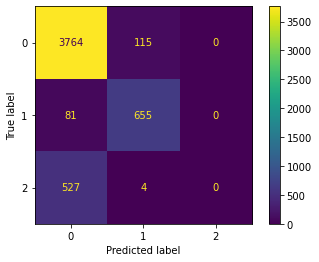

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels= clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()